<a href="https://colab.research.google.com/github/sheltonmaharesh/Projects/blob/main/HelmNet_Project_Answers_Shelton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Business Context**

Enhancing Workplace Safety through Automated Helmet Detection
Ensuring worker safety in high-risk environments—such as construction sites and industrial plants—is critical to preventing accidents and injuries. A fundamental safety measure in such settings is the use of protective helmets, which safeguard against head trauma caused by falling objects or machinery-related incidents. However, enforcing helmet compliance manually can be inefficient and error-prone, particularly in large-scale operations.

To address this challenge, SafeGuard Corp is developing an automated image analysis system designed to detect whether workers are wearing safety helmets. This advanced system aims to streamline safety monitoring, enabling real-time compliance checks and significantly reducing the likelihood of head injuries. By automating helmet detection, SafeGuard seeks to enhance enforcement accuracy, improve operational efficiency, and promote a culture of safety—ultimately minimizing human oversight errors and saving lives.

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

The primary objective is to develop an image classification model capable of accurately categorizing images into two distinct classes:

1. **With Helmet:** Images in which workers are properly wearing safety helmets.
2. **Without Helmet:** Images in which workers are not wearing safety helmets.

The model will serve as a core component of an automated safety compliance system aimed at enhancing worker protection in hazardous environments.

## **Data information**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Install/Import needed Libraries**

In [1]:
# Step 1: Uninstall conflicting packages
!pip uninstall -y torch tensorflow numpy protobuf

# Step 2: Install compatible versions
!pip install torch==2.6.0+cu124 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
!pip install tensorflow==2.18.0 tf-keras tensorflow-text tensorflow-decision-forests
!pip install numpy==1.26.4 protobuf==5.29.1

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 787.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.18.0


## **Exploratory Data Analysis**

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [4]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [7]:
# connect to collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/DBA/PGP/Computer Vision/images_proj.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/DBA/PGP/Computer Vision/Labels_proj.csv')

1. There are 631 images
2. The width and height of the images in pixels are 200
3. With 3 Channels, It is a RGB image

# **Exploratory Data Analysis**

In [9]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


###Plot random images from each of the classes and print their corresponding labels.

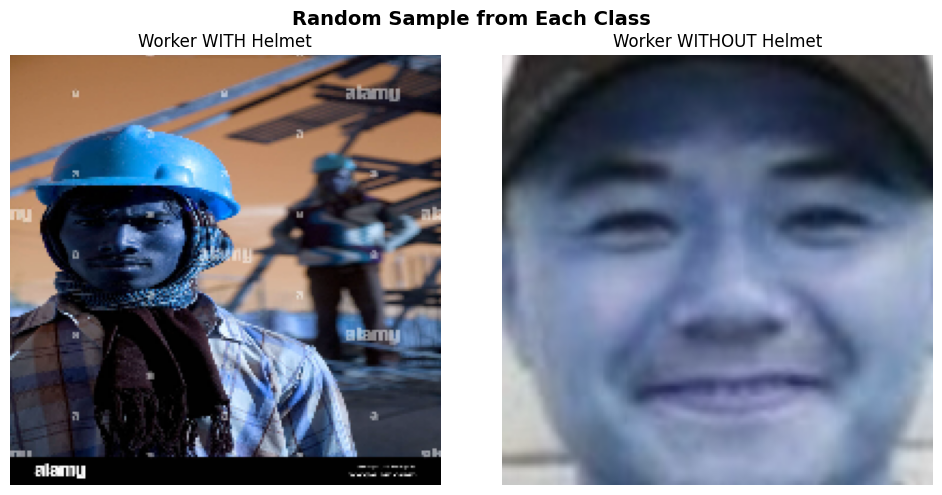

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_helmet_examples(images, labels, seed=None):
    """
    Plots one random image from each class: 'With Helmet' and 'Without Helmet'.

    Args:
        images (np.ndarray): Array of images.
        labels (np.ndarray): Binary labels (1 = with helmet, 0 = without helmet).
        seed (int, optional): Random seed for reproducibility.
    """
    if seed is not None:
        np.random.seed(seed)

    # Validate inputs
    if len(images) != len(labels):
        raise ValueError("Images and labels must have the same length.")

    # Get indices by class
    helmet_indices = np.where(labels == 1)[0]
    no_helmet_indices = np.where(labels == 0)[0]

    if len(helmet_indices) == 0 or len(no_helmet_indices) == 0:
        raise ValueError("Both classes must have at least one image.")

    # Randomly select one image from each class
    helmet_img = images[np.random.choice(helmet_indices)]
    no_helmet_img = images[np.random.choice(no_helmet_indices)]

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    titles = ["Worker WITH Helmet", "Worker WITHOUT Helmet"]
    images_to_plot = [helmet_img, no_helmet_img]

    for ax, img, title in zip(axes, images_to_plot, titles):
        ax.imshow(img)
        ax.set_title(title, fontsize=12)
        ax.axis('off')

    fig.suptitle("Random Sample from Each Class", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Example usage
plot_random_helmet_examples(images, labels, seed=42)

## Checking for class imbalance


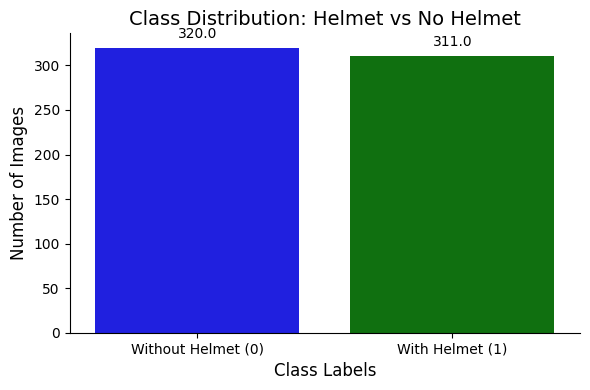

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_class_distribution(labels):
    """
    Plots the class distribution of helmet vs. no-helmet images.

    Args:
        labels (array-like): Binary class labels (0 = no helmet, 1 = with helmet).
                             Can be a 1D array, Series, or DataFrame with a single column.
    """
    # Convert to Series for consistency
    if isinstance(labels, pd.DataFrame):
        if labels.shape[1] != 1:
            raise ValueError("Labels DataFrame should have exactly one column.")
        labels = labels.iloc[:, 0]
    elif isinstance(labels, np.ndarray) and labels.ndim > 1:
        labels = labels.ravel()
    labels = pd.Series(labels)

    # Create countplot
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=labels, palette=['blue', 'green'])

    # Add counts on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=10)

    # Format plot
    plt.xlabel("Class Labels", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.title("Class Distribution: Helmet vs No Helmet", fontsize=14)
    plt.xticks(ticks=[0, 1], labels=["Without Helmet (0)", "With Helmet (1)"])
    sns.despine()
    plt.tight_layout()
    plt.show()

# Example usage:
plot_class_distribution(labels)


- The classes are balanced.

## Check Pixel Intensity Distribution

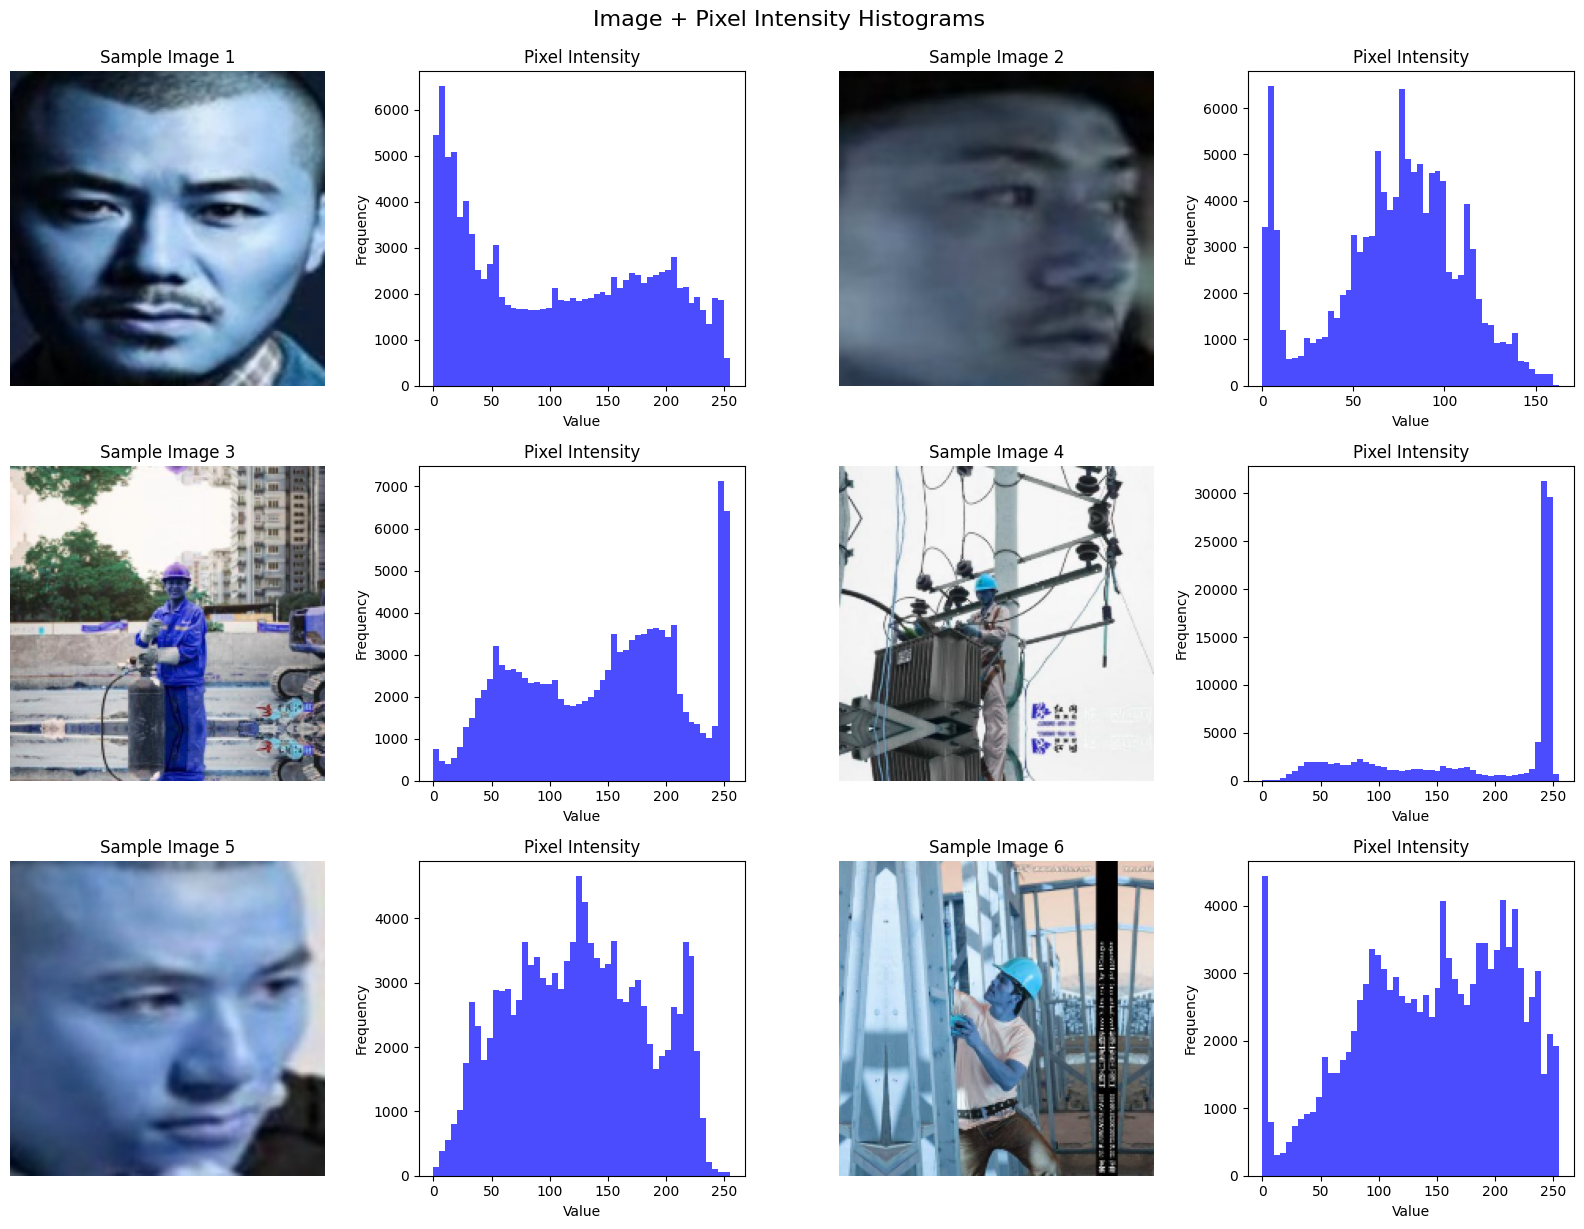

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_with_histograms(images, n=6, seed=None):
    """
    Plots a grid of images and their corresponding pixel intensity histograms.

    Args:
        images (np.ndarray): Array of images (H, W, C) or (H, W).
        n (int): Number of images to display (must be even).
        seed (int, optional): Random seed for reproducibility.
    """
    if seed is not None:
        np.random.seed(seed)

    assert n % 2 == 0, "Please use an even number of images (2, 4, 6, ...)"
    idxs = np.random.choice(len(images), size=n, replace=False)
    selected_images = [images[i] for i in idxs]

    fig, axes = plt.subplots(nrows=n // 2, ncols=4, figsize=(16, (n // 2) * 4))

    for i, img in enumerate(selected_images):
        row = i // 2
        col_img = axes[row, (i % 2) * 2]
        col_hist = axes[row, (i % 2) * 2 + 1]

        # Display image
        if img.ndim == 3 and img.shape[-1] == 1:
            img = img.squeeze(-1)
        col_img.imshow(img, cmap='gray' if img.ndim == 2 else None)
        col_img.set_title(f"Sample Image {i+1}")
        col_img.axis('off')

        # Plot histogram
        col_hist.hist(img.ravel(), bins=50, color='blue', alpha=0.7)
        col_hist.set_title("Pixel Intensity")
        col_hist.set_xlabel("Value")
        col_hist.set_ylabel("Frequency")

    plt.tight_layout()
    plt.suptitle("Image + Pixel Intensity Histograms", fontsize=16, y=1.02)
    plt.show()

# Example usage
plot_images_with_histograms(images, n=6, seed=42)

Sample Images 1, 2, 3, 5, 6:
Visual: All appear very blue-tinted (possibly lighting artifacts or incorrectly white-balanced).

Histogram: Skewed toward lower intensities and/or dominated by the blue channel.

Preprocessing:

1. Apply color correction or normalization to balance RGB channels.

2. Consider using histogram equalization or CLAHE (Contrast Limited Adaptive Histogram Equalization) to improve contrast.

# **Data Preprocessing**

## Converting images to grayscale

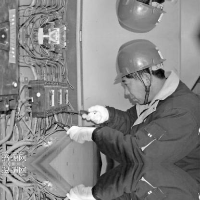

In [10]:
images_gray = []
for i in range(len(images)):
    img_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    images_gray.append(img_gray)

# Display a sample grayscale image
n = 6
cv2_imshow(images_gray[n])

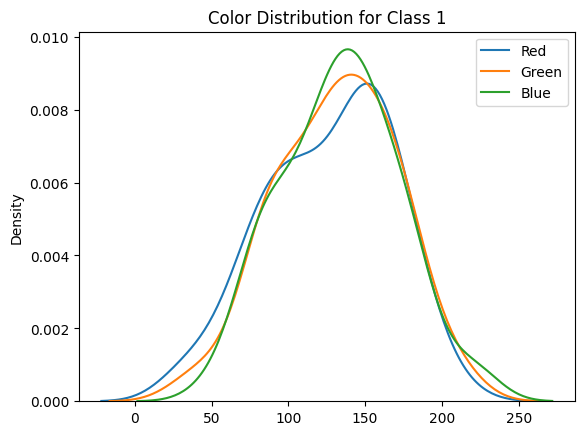

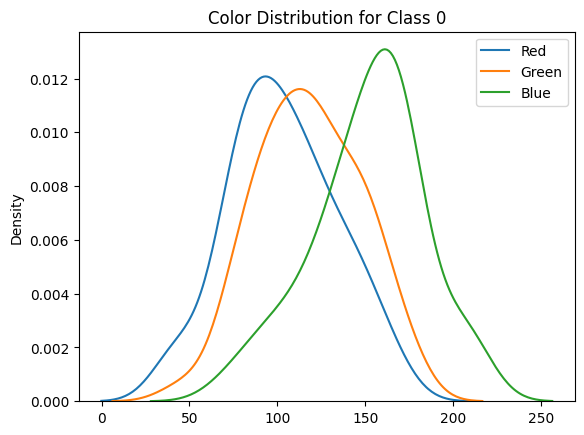

In [11]:
def plot_rgb_mean(images, labels, class_label):
    idxs = np.where(labels == class_label)[0]
    sample_imgs = images[idxs[:50]]  # sample for speed
    means = np.mean(sample_imgs, axis=(1, 2))
    r, g, b = means[:, 0], means[:, 1], means[:, 2]
    sns.kdeplot(r, label='Red')
    sns.kdeplot(g, label='Green')
    sns.kdeplot(b, label='Blue')
    plt.title(f"Color Distribution for Class {class_label}")
    plt.legend()
    plt.show()

plot_rgb_mean(images, labels, class_label=1)  # With Helmet
plot_rgb_mean(images, labels, class_label=0)  # Without Helmet


1. Class 0 is visibly bluer, which could become a shortcut for the model: it might associate "blueness" with absence of a helmet.

2. Class 1 has a healthier, more balanced color distribution, making it more robust for training.

3. This raises a concern about spurious correlations. If blue = "no helmet" in many training images, your model might fail in real-world cases with different lighting or uniforms.

## Canny Edge Detection Grid to check edges

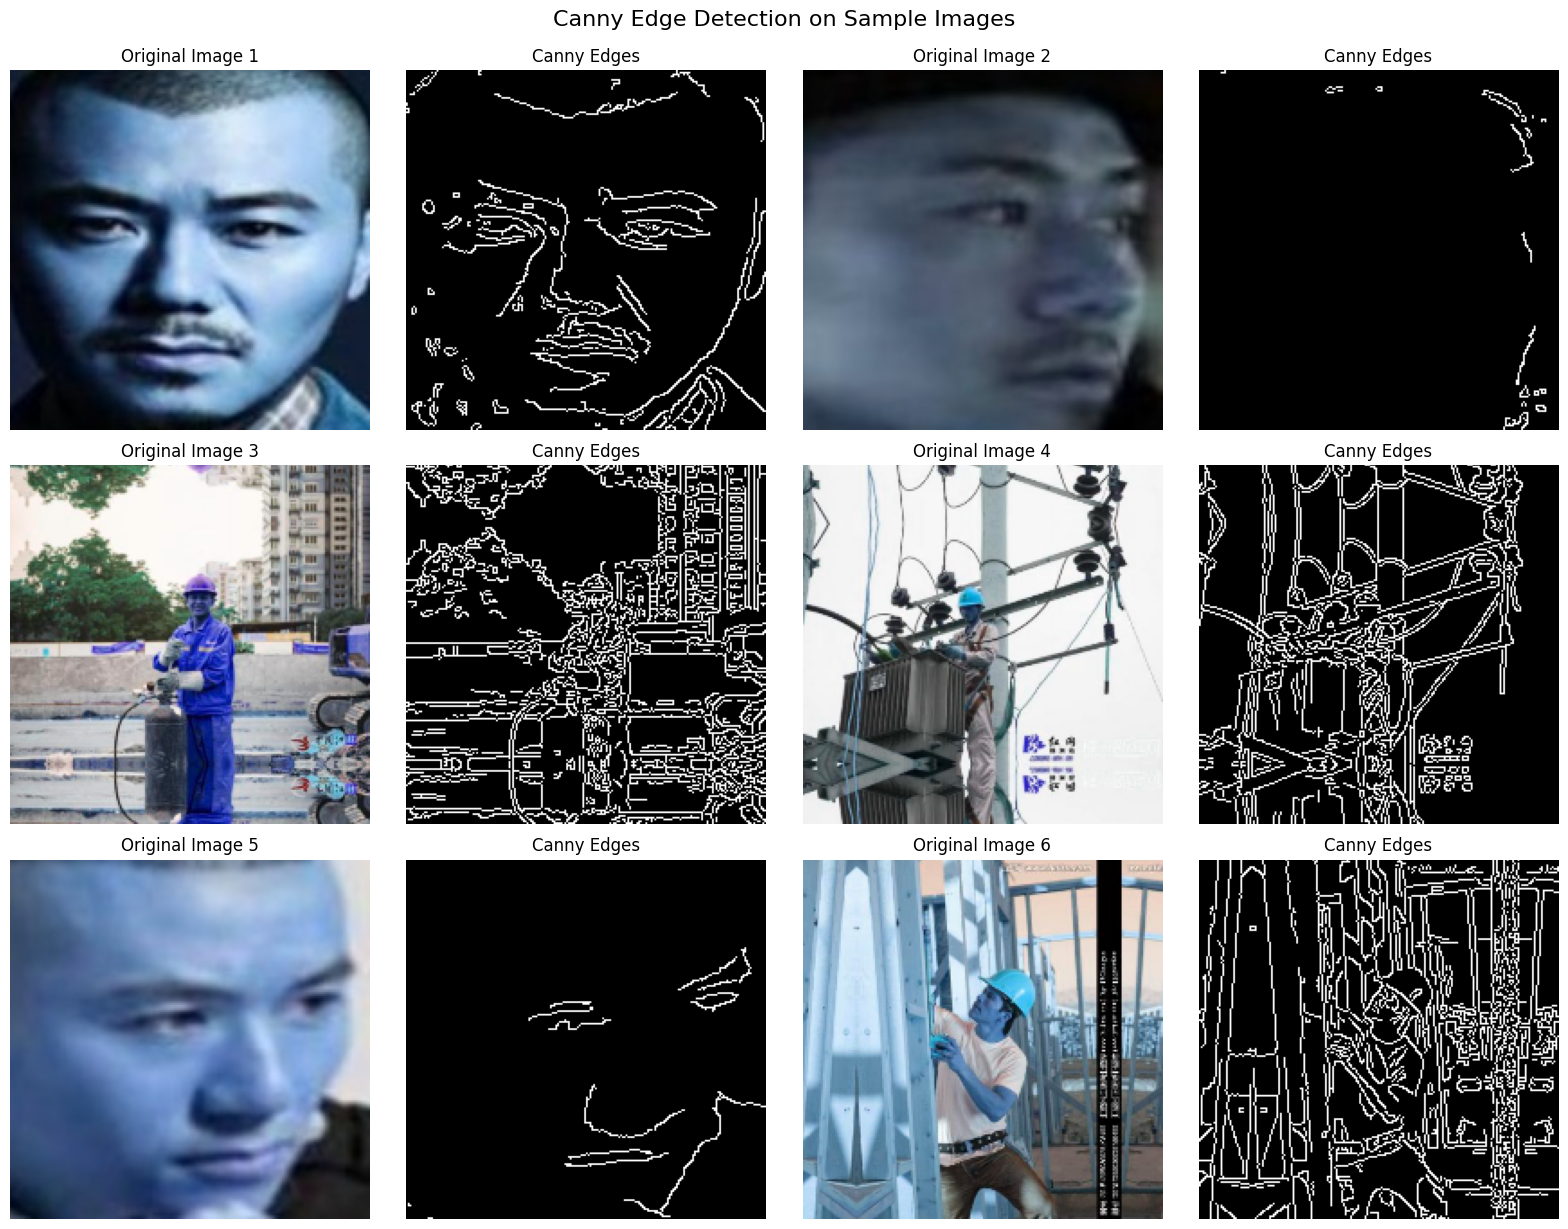

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def plot_edge_detection_grid(images, n=6, seed=None):
    """
    Displays a grid of original images alongside their Canny edge maps.

    Args:
        images (np.ndarray): Array of images (H, W, C) or (H, W).
        n (int): Number of images to display (must be even).
        seed (int, optional): Random seed for reproducibility.
    """
    if seed is not None:
        np.random.seed(seed)

    assert n % 2 == 0, "Please use an even number for n (2, 4, 6, ...)"
    idxs = np.random.choice(len(images), size=n, replace=False)

    fig, axes = plt.subplots(nrows=n//2, ncols=4, figsize=(16, (n//2) * 4))

    for i, idx in enumerate(idxs):
        img = images[idx]
        if img.ndim == 3 and img.shape[-1] == 1:
            img = img.squeeze(-1)

        # Convert to grayscale for Canny
        if img.ndim == 3:
            img_gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        else:
            img_gray = (img * 255).astype(np.uint8)

        # Apply Canny edge detection
        edges = cv2.Canny(img_gray, threshold1=100, threshold2=200)

        # Display original image
        ax_img = axes[i//2, (i % 2) * 2]
        ax_img.imshow(img, cmap='gray' if img.ndim == 2 else None)
        ax_img.set_title(f"Original Image {i+1}")
        ax_img.axis('off')

        # Display edges
        ax_edge = axes[i//2, (i % 2) * 2 + 1]
        ax_edge.imshow(edges, cmap='gray')
        ax_edge.set_title("Canny Edges")
        ax_edge.axis('off')

    plt.tight_layout()
    plt.suptitle("Canny Edge Detection on Sample Images", fontsize=16, y=1.02)
    plt.show()

# Example usage
plot_edge_detection_grid(images, n=6, seed=42)

The helmets are very clearly visible and has a shape (edges are clear) and this will help assess contrast and detail, especially important for: Training shape-based models (like CNNs)

### Splitting the dataset



- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [13]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 200, 200, 3) (504, 1)
(63, 200, 200, 3) (63, 1)
(64, 200, 200, 3) (64, 1)


### Data Normalization

Since our exploratory data analysis revealed that pixel intensity values across images range from 0 to 255, an essential preprocessing step is to normalize these values for consistent model training.

To achieve this, we apply min-max scaling, dividing all pixel values by 255. This transforms the data into a standardized range between 0 and 1, which improves numerical stability and ensures that gradient-based optimization algorithms converge more efficiently. By aligning this step with our earlier analysis of pixel intensity distributions, we ensure the input data is both well-understood and properly scaled for effective learning.

In [14]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# **Model Building**

##Model Evaluation Criterion

### Focus on False Positives

**Labels:**
- `1` = With Helmet
- `0` = Without Helmet

**False Positive (FP):**
- Model predicts **"With Helmet"**, but worker is **not wearing one**
- **Impact:** Critical safety risk — real violation goes undetected  
- **Goal:** Minimize FP to avoid dangerous oversight  
- **Metric to improve:** Precision = TP / (TP + FP)

**False Negative (FN):**
- Model predicts **"Without Helmet"**, but worker **is wearing one**
- **Impact:** Unnecessary warning, but no safety threat  
- **Tolerable** in safety-critical systems

**Conclusion:**  
We will Prioritize **high precision** to ensure real helmet violations are never missed.


## Utility Functions

In [15]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [16]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

**Building a CNN Model**
The model has two main parts:

**Feature Extraction**

1. Uses convolution and pooling layers

2. Learns patterns like edges and shapes from the images

**Classification**

1. Uses dense (fully connected) layers

2. Predicts if the worker is with helmet (1) or without helmet (0)





In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision

# Helmet Detection CNN
model_cnn = Sequential()

# Convolution Block 1
model_cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Convolution Block 2
model_cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Convolution Block 3
model_cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Classification Head
model_cnn.add(Flatten())
model_cnn.add(Dense(8, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy', Precision()]
)

# Summary
model_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │        80,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,729 (350.50 KB)

 Trainable params: 89,729 (350.50 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
history_cnn = model_cnn.fit(
            X_train_normalized, y_train,
            epochs=20,
            validation_data=(X_val_normalized,y_val),
            shuffle=True,
            batch_size=32,
            verbose=2
)

Epoch 1/20
16/16 - 4s - 265ms/step - accuracy: 0.7163 - loss: 0.5479 - precision_2: 0.6431 - val_accuracy: 0.9841 - val_loss: 0.1898 - val_precision_2: 1.0000
Epoch 2/20
16/16 - 0s - 24ms/step - accuracy: 0.9722 - loss: 0.0874 - precision_2: 0.9756 - val_accuracy: 0.9683 - val_loss: 0.0315 - val_precision_2: 1.0000
Epoch 3/20
16/16 - 0s - 24ms/step - accuracy: 0.9821 - loss: 0.0525 - precision_2: 0.9838 - val_accuracy: 0.9841 - val_loss: 0.0280 - val_precision_2: 1.0000
Epoch 4/20
16/16 - 0s - 24ms/step - accuracy: 0.9980 - loss: 0.0133 - precision_2: 0.9960 - val_accuracy: 0.9683 - val_loss: 0.0626 - val_precision_2: 1.0000
Epoch 5/20
16/16 - 0s - 24ms/step - accuracy: 0.9980 - loss: 0.0119 - precision_2: 0.9960 - val_accuracy: 0.9524 - val_loss: 0.0953 - val_precision_2: 1.0000
Epoch 6/20
16/16 - 0s - 24ms/step - accuracy: 0.9940 - loss: 0.0117 - precision_2: 0.9960 - val_accuracy: 0.9524 - val_loss: 0.1186 - val_precision_2: 1.0000
Epoch 7/20
16/16 - 0s - 24ms/step - accuracy: 0.998

In [19]:
print(history_cnn.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])


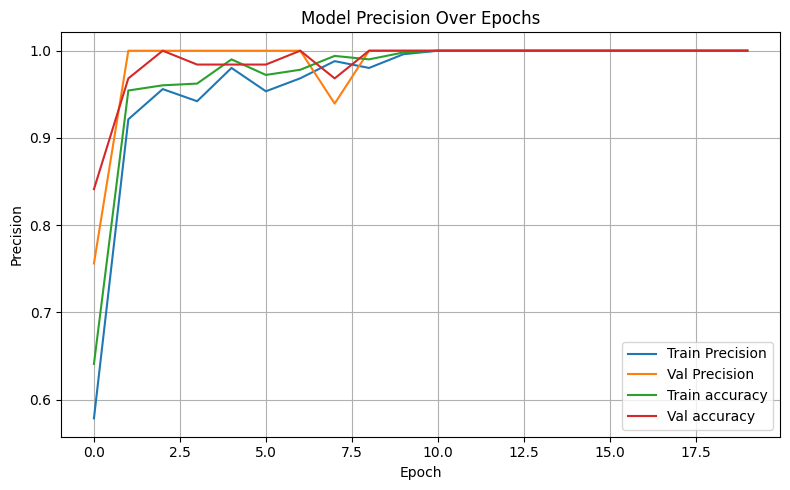

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['precision'], label='Train Precision')
plt.plot(history_cnn.history['val_precision'], label='Val Precision')
plt.plot(history_cnn.history['accuracy'], label='Train accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val accuracy')
plt.title('Model Precision Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
model_cnn_train = model_performance_classification(model_cnn, X_train_normalized,y_train)

print("Train performance metrics")
print(model_cnn_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


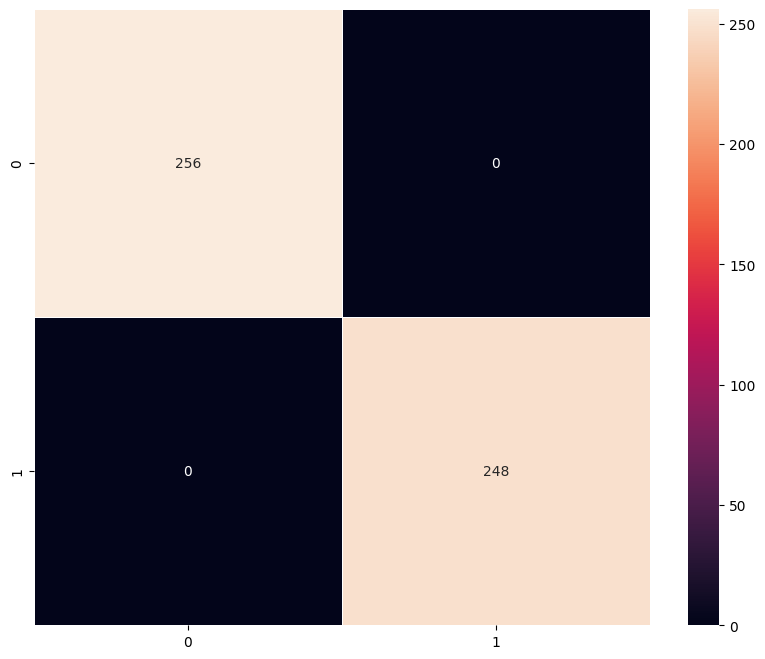

In [86]:
plot_confusion_matrix(model_cnn,X_train_normalized,y_train)

In [87]:
model_cnn_validation = model_performance_classification(model_cnn, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_cnn_validation)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


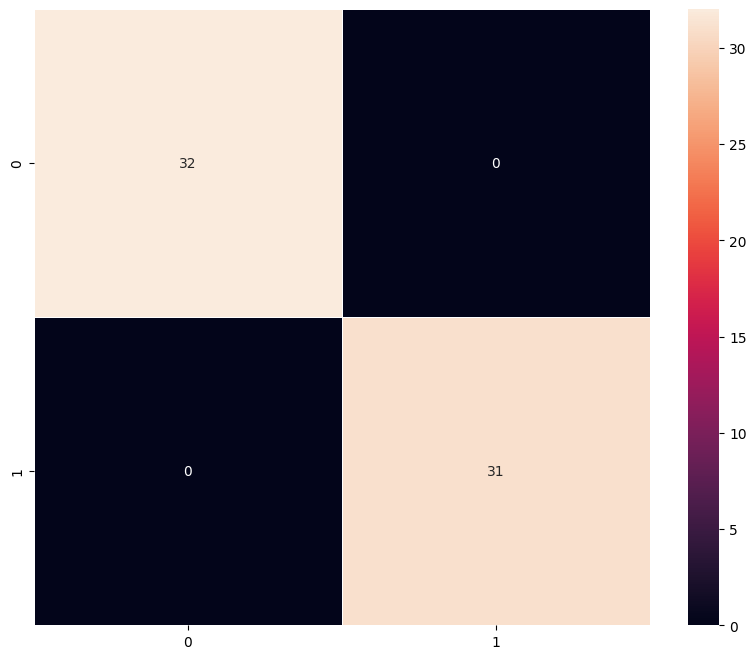

In [25]:
plot_confusion_matrix(model_cnn,X_val_normalized,y_val)

### Vizualizing the predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


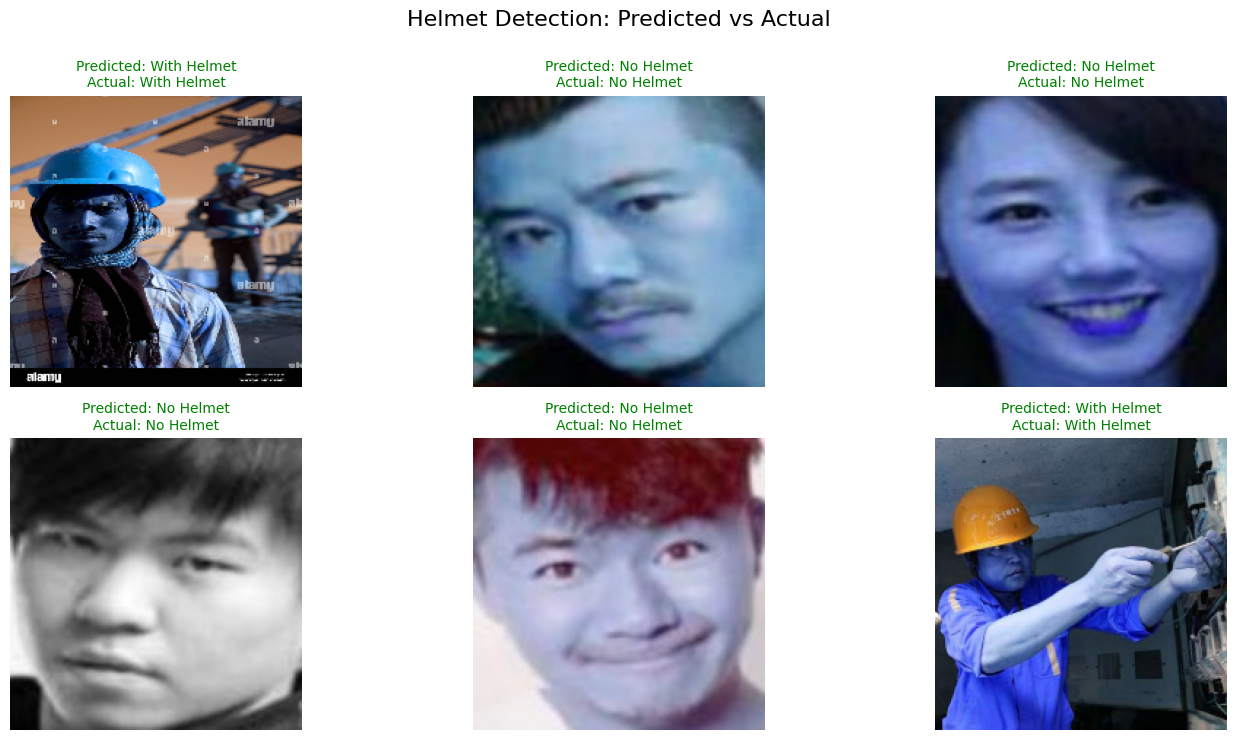

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation set
y_pred_probs = model_cnn.predict(X_val_normalized)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Pick 6 random sample indices
indices = np.random.choice(len(X_val_normalized), size=6, replace=False)

# Label mapping
class_names = {0: "No Helmet", 1: "With Helmet"}

# Plotting grid
plt.figure(figsize=(15, 7))

for i, idx in enumerate(indices):
    img = X_val_normalized[idx]
    true_label = int(y_val.iloc[idx])
    pred_label = int(y_pred_classes[idx])

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    title_color = 'green' if pred_label == true_label else 'red'
    plt.title(
        f"Predicted: {class_names[pred_label]}\nActual: {class_names[true_label]}",
        color=title_color, fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Helmet Detection: Predicted vs Actual", fontsize=16, y=1.05)
plt.show()


## Model 2: (VGG-16 (Base))

1. We will use a ready-made model called VGG16, which was trained on a large dataset called ImageNet and performed very well in a famous competition in 2014.

2. We'll keep the VGG16 layers that learn features (like edges and shapes) and won’t train them again — they will stay as they are (frozen).

3. We'll then add our own layers on top to do the final classification: a Flatten layer and one dense layer to predict if a worker is wearing a helmet or not.

In [29]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# We will Freeze all layers in the VGG model so their weights won't be updated during training
# This allows us to use the pre-learned features from ImageNet without retraining them
for layer in vgg_model.layers:
    layer.trainable = False

In [41]:
# Initialize a new sequential model
model_vcg_base = Sequential()

# Add the pre-trained VGG16 convolutional base
model_vcg_base.add(vgg_model)

# Flatten the feature maps from VGG16 into a 1D vector
model_vcg_base.add(Flatten())

# Add the final output layer for binary classification (helmet vs no helmet)
model_vcg_base.add(Dense(1, activation='sigmoid'))

In [42]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision

# Compile the model for binary classification
model_vcg_base.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=["accuracy", Precision(name='precision')]
)

In [43]:
model_vcg_base.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [44]:
train_datagen = ImageDataGenerator()

In [45]:
# Epochs
epochs = 10
# Batch size
batch_size = 8

history_vcg_base = model_vcg_base.fit(train_datagen.flow(X_train_normalized,y_train,
                                      batch_size=batch_size,
                                      seed=42,
                                      shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.8884 - loss: 0.2092 - precision: 0.8670 - val_accuracy: 1.0000 - val_loss: 0.0036 - val_precision: 1.0000
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 1.0000 - loss: 0.0033 - precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0022 - val_precision: 1.0000
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 1.0000 - loss: 0.0017 - precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0016 - val_precision: 1.0000
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 0.0012 - precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0015 - val_precision: 1.0000
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 7.7526e-04 - precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0012 - val_precision: 1.0000
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 7.2815e-04 - precision: 1.0000 - val_accuracy: 1.0000 - val_los

In [47]:
print(history_vcg_base.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])


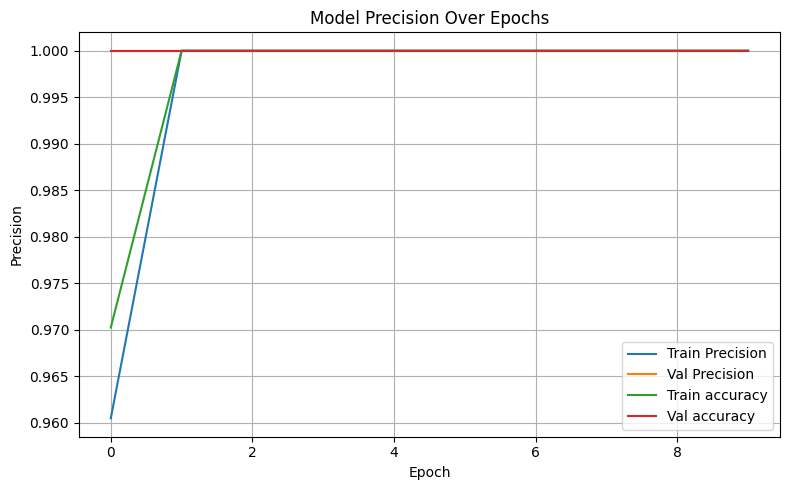

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(history_vcg_base.history['precision'], label='Train Precision')
plt.plot(history_vcg_base.history['val_precision'], label='Val Precision')
plt.plot(history_vcg_base.history['accuracy'], label='Train accuracy')
plt.plot(history_vcg_base.history['val_accuracy'], label='Val accuracy')
plt.title('Model Precision Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
model_vcg_base_train = model_performance_classification(model_vcg_base, X_train_normalized,y_train)
print("Train performance metrics")
print(model_vcg_base_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step


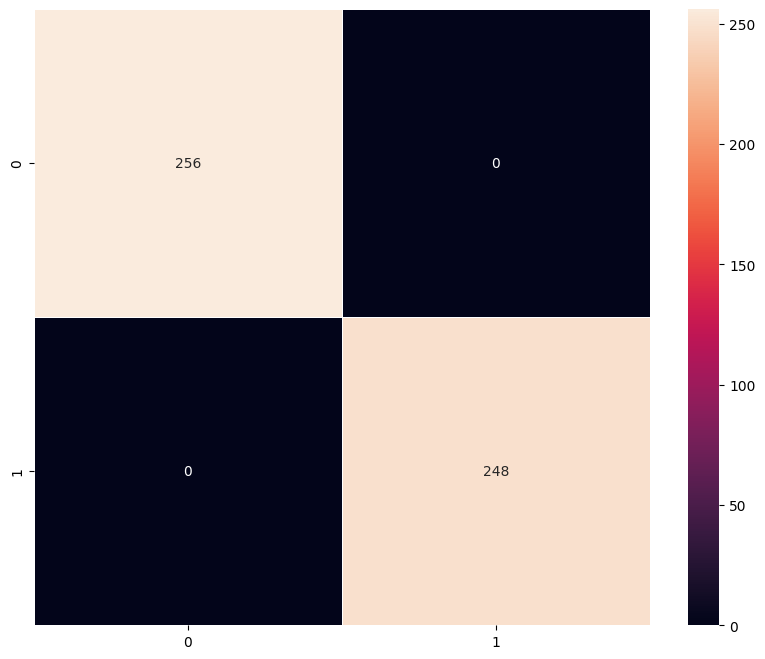

In [53]:
plot_confusion_matrix(model_vcg_base,X_train_normalized,y_train)

In [89]:
model_vcg_base_validation = model_performance_classification(model_vcg_base, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_vcg_base_validation)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


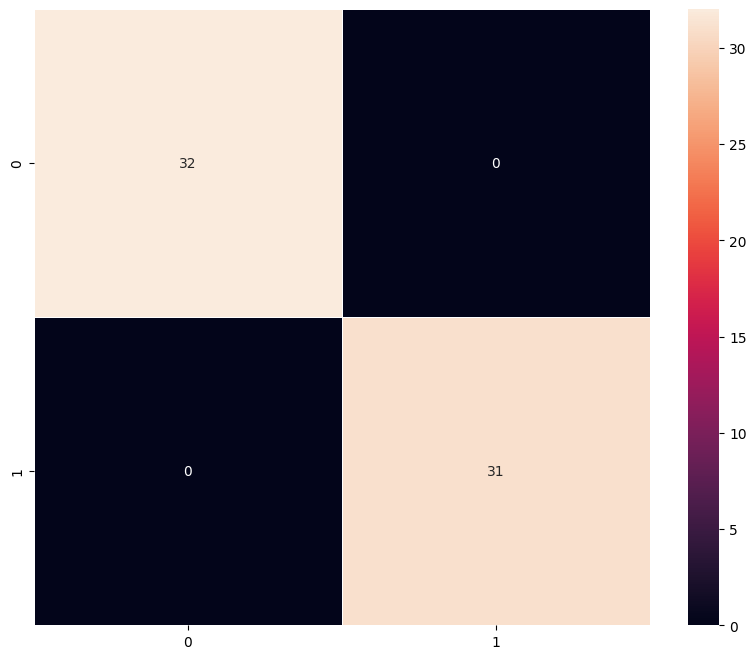

In [56]:
plot_confusion_matrix(model_vcg_base,X_val_normalized,y_val)

### Visualizing the prediction:

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


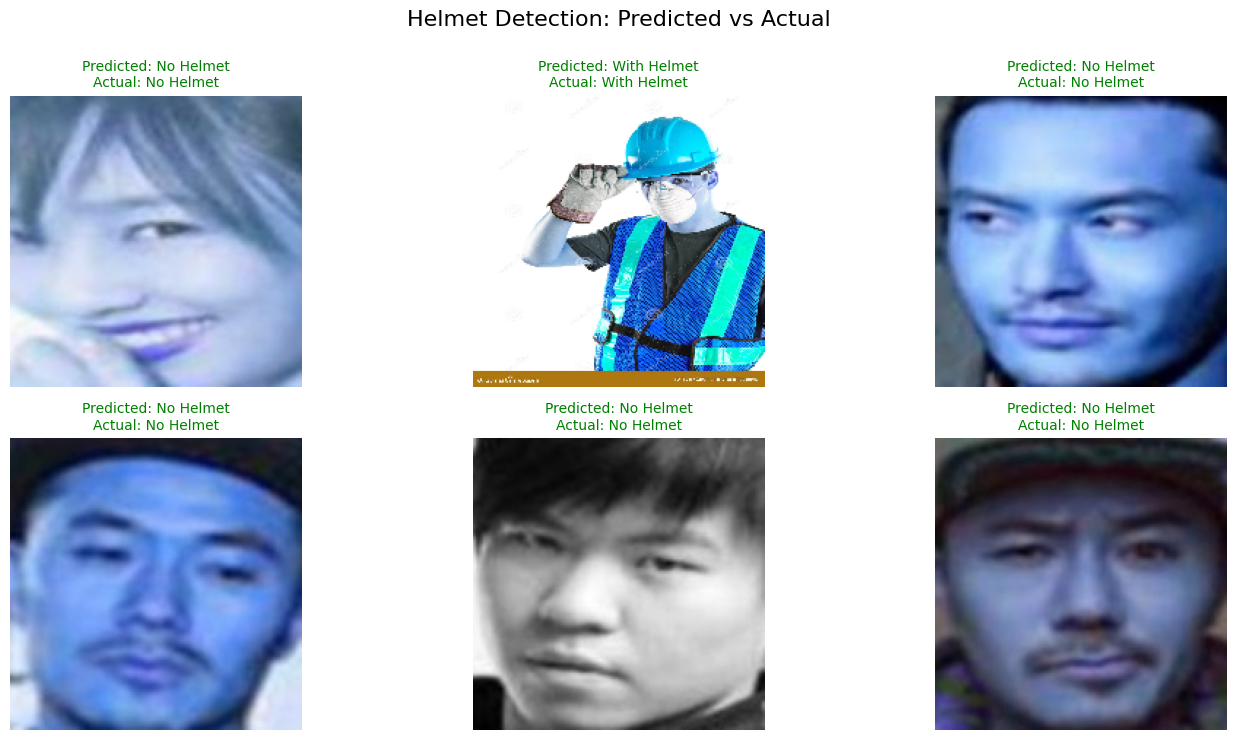

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation set
y_pred_probs = model_vcg_base.predict(X_val_normalized)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Pick 6 random sample indices
indices = np.random.choice(len(X_val_normalized), size=6, replace=False)

# Label mapping
class_names = {0: "No Helmet", 1: "With Helmet"}

# Plotting grid
plt.figure(figsize=(15, 7))

for i, idx in enumerate(indices):
    img = X_val_normalized[idx]
    true_label = int(y_val.iloc[idx])
    pred_label = int(y_pred_classes[idx])

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    title_color = 'green' if pred_label == true_label else 'red'
    plt.title(
        f"Predicted: {class_names[pred_label]}\nActual: {class_names[true_label]}",
        color=title_color, fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Helmet Detection: Predicted vs Actual", fontsize=16, y=1.05)
plt.show()


## Model 3: (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Initialize the model
model_vcg_fcnn = Sequential()

# Add the pre-trained VGG16 convolutional base
model_vcg_fcnn.add(vgg_model)

# Flatten the output from the convolutional layers
model_vcg_fcnn.add(Flatten())

# Fully connected layers (feed-forward network)
model_vcg_fcnn.add(Dense(256, activation='relu'))      # First dense layer
model_vcg_fcnn.add(Dropout(rate=0.4))                  # Dropout for regularization
model_vcg_fcnn.add(Dense(32, activation='relu'))       # Second dense layer

# Output layer for binary classification
model_vcg_fcnn.add(Dense(1, activation='sigmoid'))

In [59]:
# Compile the model with binary cross-entropy loss and precision as a key metric
model_vcg_fcnn.compile(
    optimizer= Adam(),
    loss=BinaryCrossentropy(),
    metrics=["accuracy", Precision(name='precision')]
)

In [61]:
# summary of the model
model_vcg_fcnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,441,793 (74.16 MB)

 Trainable params: 4,727,105 (18.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [62]:
history_vcg_fcnn = model_vcg_fcnn.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=8,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9087 - loss: 0.2047 - precision: 0.8957 - val_accuracy: 1.0000 - val_loss: 1.4163e-06 - val_precision: 1.0000
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9915 - loss: 0.0497 - precision: 0.9908 - val_accuracy: 1.0000 - val_loss: 1.3891e-07 - val_precision: 1.0000
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9999 - loss: 8.7607e-04 - precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0221e-08 - val_precision: 1.0000
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9968 - loss: 0.0176 - precision: 0.9961 - val_accuracy: 1.0000 - val_loss: 1.9101e-08 - val_precision: 1.0000
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9983 - loss: 0.0035 - precision: 0.9980 - val_accuracy: 1.0000 - val_loss: 2.2550e-10 - val_precision: 1.0000
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 8.8114e-06 - precision: 1.0000 - val_accura

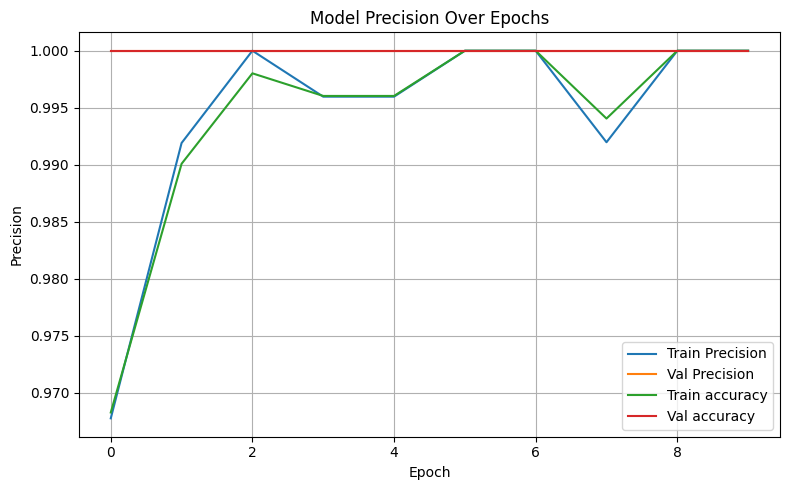

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(history_vcg_fcnn.history['precision'], label='Train Precision')
plt.plot(history_vcg_fcnn.history['val_precision'], label='Val Precision')
plt.plot(history_vcg_fcnn.history['accuracy'], label='Train accuracy')
plt.plot(history_vcg_fcnn.history['val_accuracy'], label='Val accuracy')
plt.title('Model Precision Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
model_vcg_fcnn_train = model_performance_classification(model_vcg_fcnn, X_train_normalized,y_train)

print("Train performance metrics")
print(model_vcg_fcnn_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step


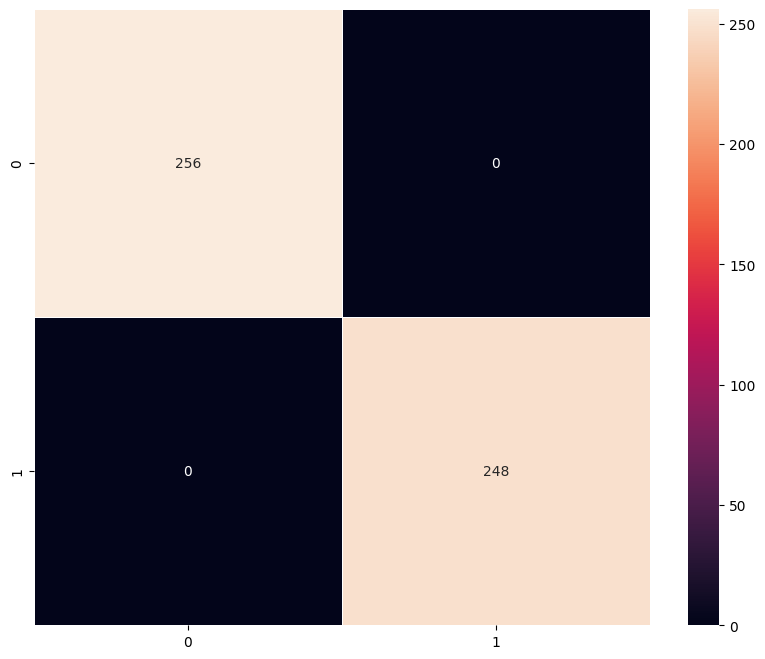

In [65]:
plot_confusion_matrix(model_vcg_fcnn,X_train_normalized,y_train)

In [66]:
model_vcg_fcnn_validation = model_performance_classification(model_vcg_fcnn, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_vcg_fcnn_validation)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


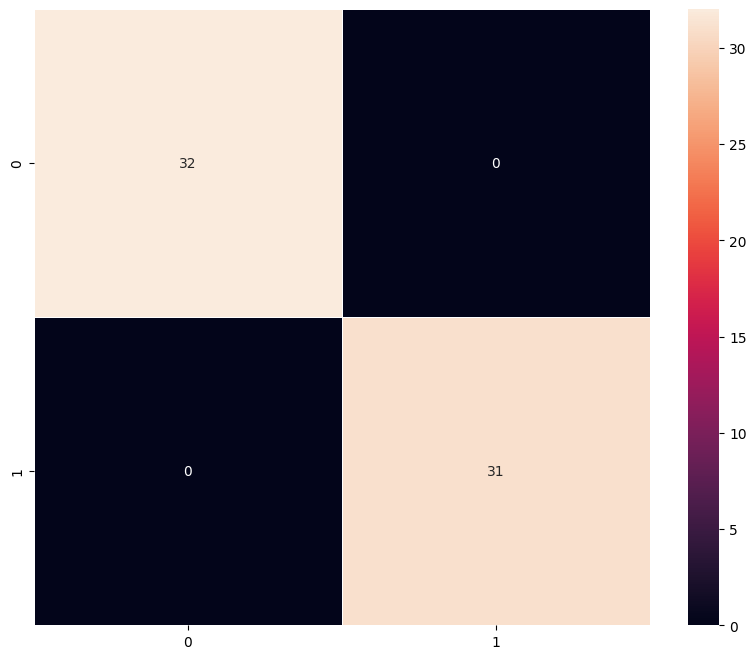

In [67]:
plot_confusion_matrix(model_vcg_fcnn,X_val_normalized,y_val)

#### Visualizing the predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


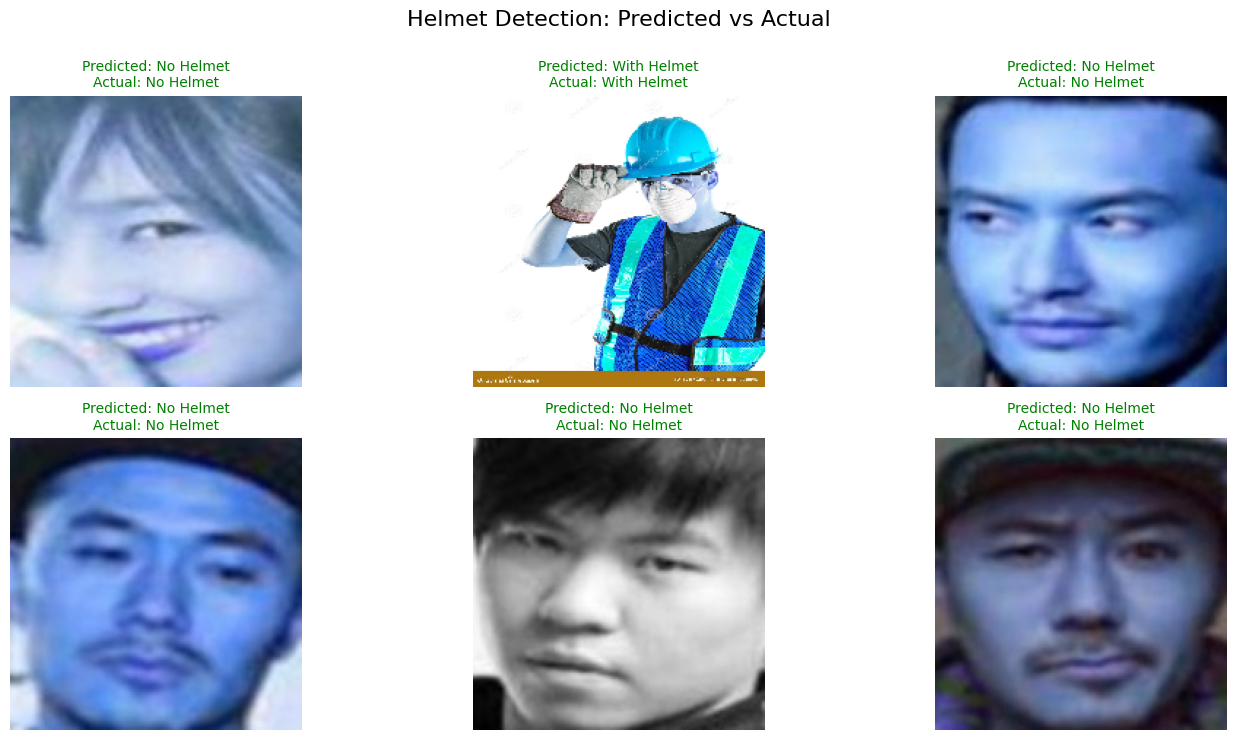

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation set
y_pred_probs = model_vcg_fcnn.predict(X_val_normalized)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Pick 6 random sample indices
indices = np.random.choice(len(X_val_normalized), size=6, replace=False)

# Label mapping
class_names = {0: "No Helmet", 1: "With Helmet"}

# Plotting grid
plt.figure(figsize=(15, 7))

for i, idx in enumerate(indices):
    img = X_val_normalized[idx]
    true_label = int(y_val.iloc[idx])
    pred_label = int(y_pred_classes[idx])

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    title_color = 'green' if pred_label == true_label else 'red'
    plt.title(
        f"Predicted: {class_names[pred_label]}\nActual: {class_names[true_label]}",
        color=title_color, fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Helmet Detection: Predicted vs Actual", fontsize=16, y=1.05)
plt.show()


## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Build model_4 using the VGG16 convolutional base
model_vcg_fcnn_data_aug = Sequential()

# Add the pre-trained VGG16 layers (convolution + pooling, already frozen)
model_vcg_fcnn_data_aug.add(vgg_model)

# Flatten the feature maps from VGG16 into a 1D vector
model_vcg_fcnn_data_aug.add(Flatten())

# Add custom fully connected layers for classification
model_vcg_fcnn_data_aug.add(Dense(256, activation='relu'))    # First dense layer
model_vcg_fcnn_data_aug.add(Dropout(0.4))                     # Dropout to prevent overfitting
model_vcg_fcnn_data_aug.add(Dense(32, activation='relu'))     # Second dense layer

# Output layer for binary classification (helmet vs. no helmet)
model_vcg_fcnn_data_aug.add(Dense(1, activation='sigmoid'))

In [71]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision

# Compile model_4 with binary cross-entropy loss and precision metric
model_vcg_fcnn_data_aug.compile(
    optimizer = Adam(),
    loss=BinaryCrossentropy(),
    metrics=["accuracy", Precision(name='precision')]
)

In [72]:
# summary of the model
model_vcg_fcnn_data_aug.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,441,793 (74.16 MB)

 Trainable params: 4,727,105 (18.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining our data augmentation configuration
train_datagen = ImageDataGenerator(
    horizontal_flip=True,          # Set to True to flip images horizontally
    vertical_flip=False,           # Set to True to flip images vertically
    height_shift_range=0.1,        # Shift image vertically by 10% (range: 0.0 to 1.0)
    width_shift_range=0.1,         # Shift image horizontally by 10%
    rotation_range=20,             # Rotate image randomly by 0 to 20 degrees
    shear_range=0.1,               # Shear transformation (range: 0.0 to 1.0)
    zoom_range=0.2,                # Zoom in/out by up to 20%
    fill_mode='nearest'            # Fill empty pixels after transform
)

# IMPORTANT: No augmentation for validation data
val_datagen = ImageDataGenerator(rescale=1./255)


In [77]:
# Fit the model using augmented training data
history_vcg_fcnn_data_aug = model_vcg_fcnn_data_aug.fit(
    train_datagen.flow(
        X_train_normalized, y_train,
        batch_size=8,
        seed=42,
        shuffle=True  # Set to True for shuffling is desired
    ),
    epochs=20,
    steps_per_epoch=X_train_normalized.shape[0] // 8,  # Using same batch size as above
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8488 - loss: 0.5639 - precision: 0.8313 - val_accuracy: 1.0000 - val_loss: 1.0479e-09 - val_precision: 1.0000
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 1.0000 - loss: 0.0017 - precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.1733e-10 - val_precision: 1.0000
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9858 - loss: 0.0905 - precision: 0.9882 - val_accuracy: 1.0000 - val_loss: 3.2242e-09 - val_precision: 1.0000
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9931 - loss: 0.0312 - precision: 0.9932 - val_accuracy: 1.0000 - val_loss: 1.9518e-10 - val_precision: 1.0000
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9960 - loss: 0.0079 - precision: 0.9947 - val_accuracy: 1.0000 - val_loss: 7.5611e-07 - val_precision: 1.0000
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9977 - loss: 0.0121 - precision: 0.9967 - val_accuracy: 1.00

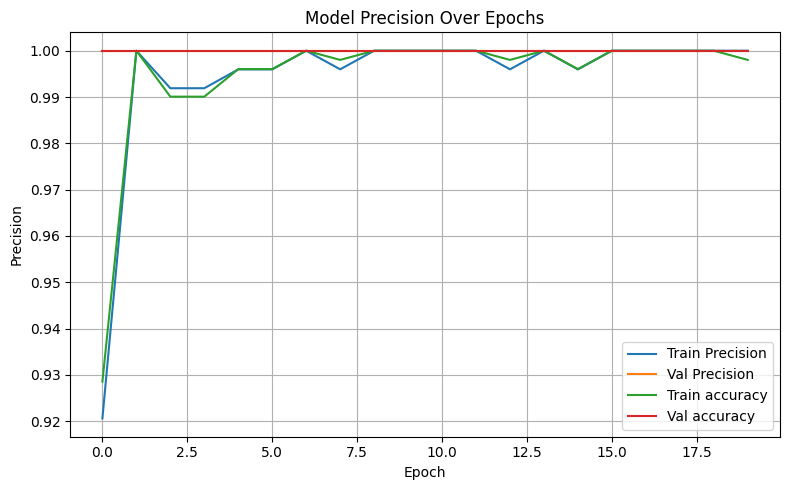

In [78]:
plt.figure(figsize=(8, 5))
plt.plot(history_vcg_fcnn_data_aug.history['precision'], label='Train Precision')
plt.plot(history_vcg_fcnn_data_aug.history['val_precision'], label='Val Precision')
plt.plot(history_vcg_fcnn_data_aug.history['accuracy'], label='Train accuracy')
plt.plot(history_vcg_fcnn_data_aug.history['val_accuracy'], label='Val accuracy')
plt.title('Model Precision Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
model_vcg_fcnn_data_aug_train = model_performance_classification(model_vcg_fcnn_data_aug, X_train_normalized,y_train)

print("Train performance metrics")
print(model_vcg_fcnn_data_aug_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step


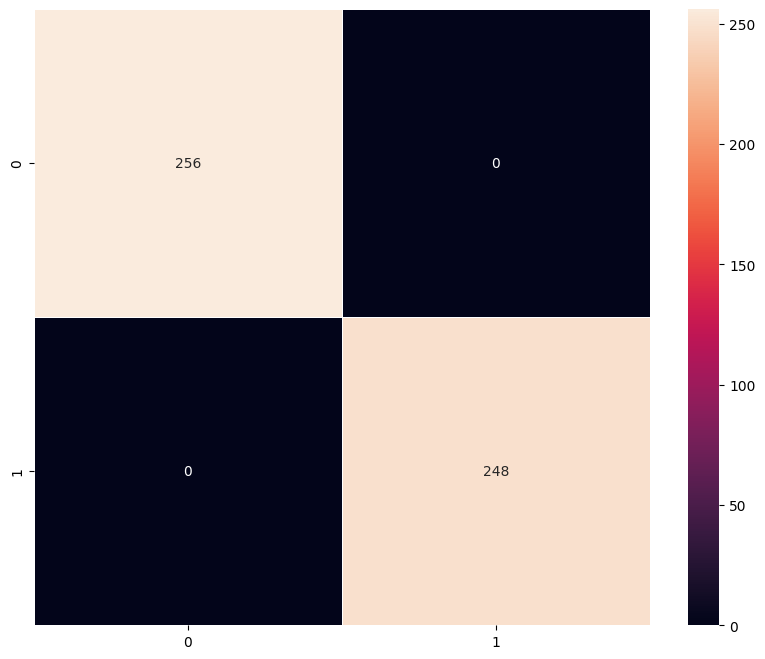

In [80]:
plot_confusion_matrix(model_vcg_fcnn_data_aug,X_train_normalized,y_train)

In [81]:
model_vcg_fcnn_data_aug_validation = model_performance_classification(model_vcg_fcnn_data_aug, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_vcg_fcnn_data_aug_validation)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


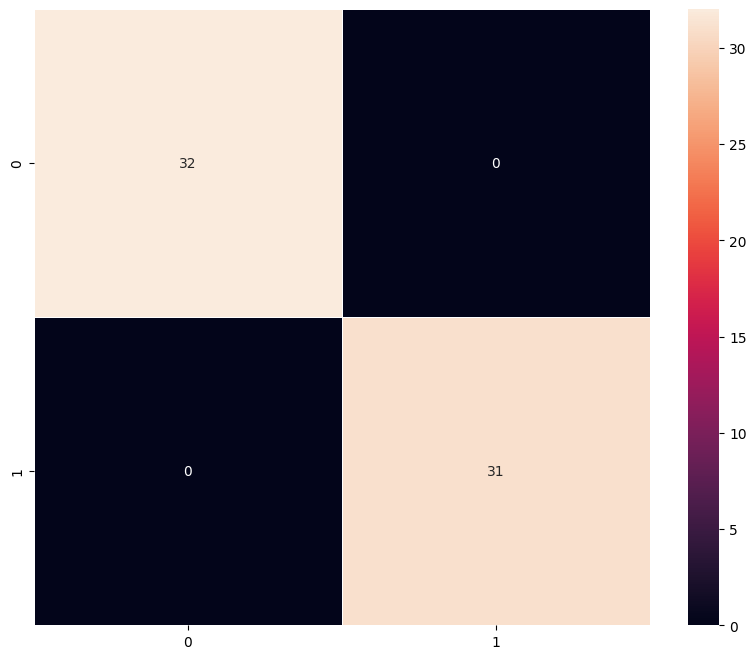

In [83]:
plot_confusion_matrix(model_vcg_fcnn_data_aug,X_val_normalized,y_val)

#### Visualizing the predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


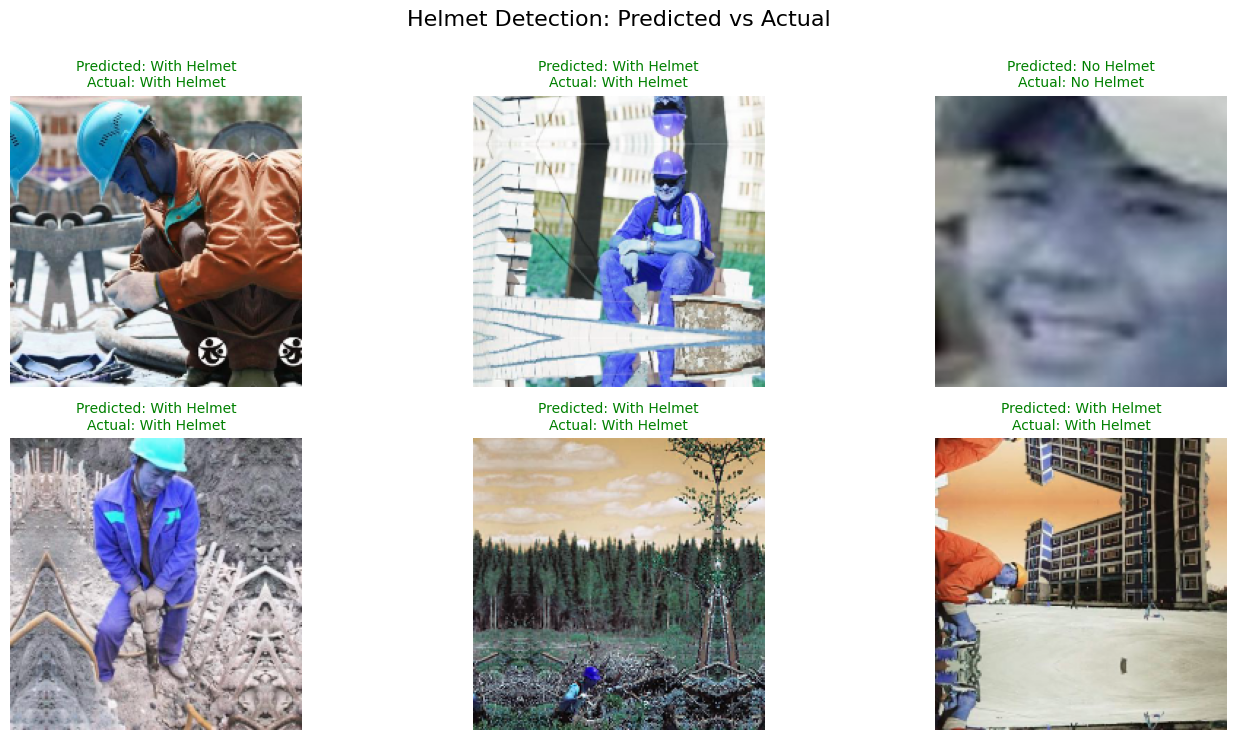

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation set
y_pred_probs = model_vcg_fcnn_data_aug.predict(X_val_normalized)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Pick 6 random sample indices
indices = np.random.choice(len(X_val_normalized), size=6, replace=False)

# Label mapping
class_names = {0: "No Helmet", 1: "With Helmet"}

# Plotting grid
plt.figure(figsize=(15, 7))

for i, idx in enumerate(indices):
    img = X_val_normalized[idx]
    true_label = int(y_val.iloc[idx])
    pred_label = int(y_pred_classes[idx])

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    title_color = 'green' if pred_label == true_label else 'red'
    plt.title(
        f"Predicted: {class_names[pred_label]}\nActual: {class_names[true_label]}",
        color=title_color, fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Helmet Detection: Predicted vs Actual", fontsize=16, y=1.05)
plt.show()


# **Model Performance Comparison and Final Model Selection**

In [90]:
# Compare training performance across different models

# Combine training performance dataframes (transposed)
models_train_comp_df = pd.concat(
    [
        model_cnn_train.T,
        model_vcg_base_train.T,
        model_vcg_fcnn_train.T,
        model_vcg_fcnn_data_aug_train.T,
    ],
    axis=1
)

# Model types
models_train_comp_df.columns = [
    "CNN",
    "VGG-16 Base Model",
    "VGG-16 Base + FCNN",
    "VGG-16 Base + FCNN + Data Augmentation"
]


In [91]:
# 📊 Compare validation performance across different models

# Combine validation performance DataFrames (transposed)
models_valid_comp_df = pd.concat(
    [
        model_cnn_validation.T,
        model_vcg_base_validation.T,
        model_vcg_fcnn_validation.T,
        model_vcg_fcnn_data_aug_validation.T,
    ],
    axis=1
)

# Assign readable column names
models_valid_comp_df.columns = [
    "Simple CNN",
    "VGG-16 (Base)",
    "VGG-16 (Base + FFNN)",
    "VGG-16 (Base + FFNN + Data Augmentation)"
]

In [92]:
models_train_comp_df

CNN  VGG-16 Base Model  VGG-16 Base + FCNN  \
Accuracy   1.0                1.0                 1.0   
Recall     1.0                1.0                 1.0   
Precision  1.0                1.0                 1.0   
F1 Score   1.0                1.0                 1.0   

           VGG-16 Base + FCNN + Data Augmentation  
Accuracy                                      1.0  
Recall                                        1.0  
Precision                                     1.0  
F1 Score                                      1.0

In [93]:
models_valid_comp_df

Simple CNN  VGG-16 (Base)  VGG-16 (Base + FFNN)  \
Accuracy          1.0            1.0                   1.0   
Recall            1.0            1.0                   1.0   
Precision         1.0            1.0                   1.0   
F1 Score          1.0            1.0                   1.0   

           VGG-16 (Base + FFNN + Data Augmentation)  
Accuracy                                        1.0  
Recall                                          1.0  
Precision                                       1.0  
F1 Score                                        1.0

- All the models have achieved high performance.  

- However, the last model, which was trained with data augmentation, is likely to generalize better since it has been exposed to a variety of images.

## Test Performance

In [97]:
# Evaluate all 4 models on test data
model_cnn_test = model_performance_classification(model_cnn, X_test_normalized, y_test)
model_vcg_base_test = model_performance_classification(model_vcg_base, X_test_normalized, y_test)
model_vcg_fcnn_test = model_performance_classification(model_vcg_fcnn, X_test_normalized, y_test)
model_vcg_fcnn_data_aug_test = model_performance_classification(model_vcg_fcnn_data_aug, X_test_normalized, y_test)

# 📊 Create a DataFrame to compare test performance
models_test_comp_df = pd.concat(
    [
        model_cnn_test.T,
        model_vcg_base_test.T,
        model_vcg_fcnn_test.T,
        model_vcg_fcnn_data_aug_test.T
    ],
    axis=1
)

models_test_comp_df.columns = [
    "Simple CNN",
    "VGG-16 (Base)",
    "VGG-16 (Base + FFNN)",
    "VGG-16 (Base + FFNN + Data Augmentation)"
]

# View the test comparison
models_test_comp_df


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Simple CNN  VGG-16 (Base)  VGG-16 (Base + FFNN)  \
Accuracy          1.0            1.0                   1.0   
Recall            1.0            1.0                   1.0   
Precision         1.0            1.0                   1.0   
F1 Score          1.0            1.0                   1.0   

           VGG-16 (Base + FFNN + Data Augmentation)  
Accuracy                                        1.0  
Recall                                          1.0  
Precision                                       1.0  
F1 Score                                        1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


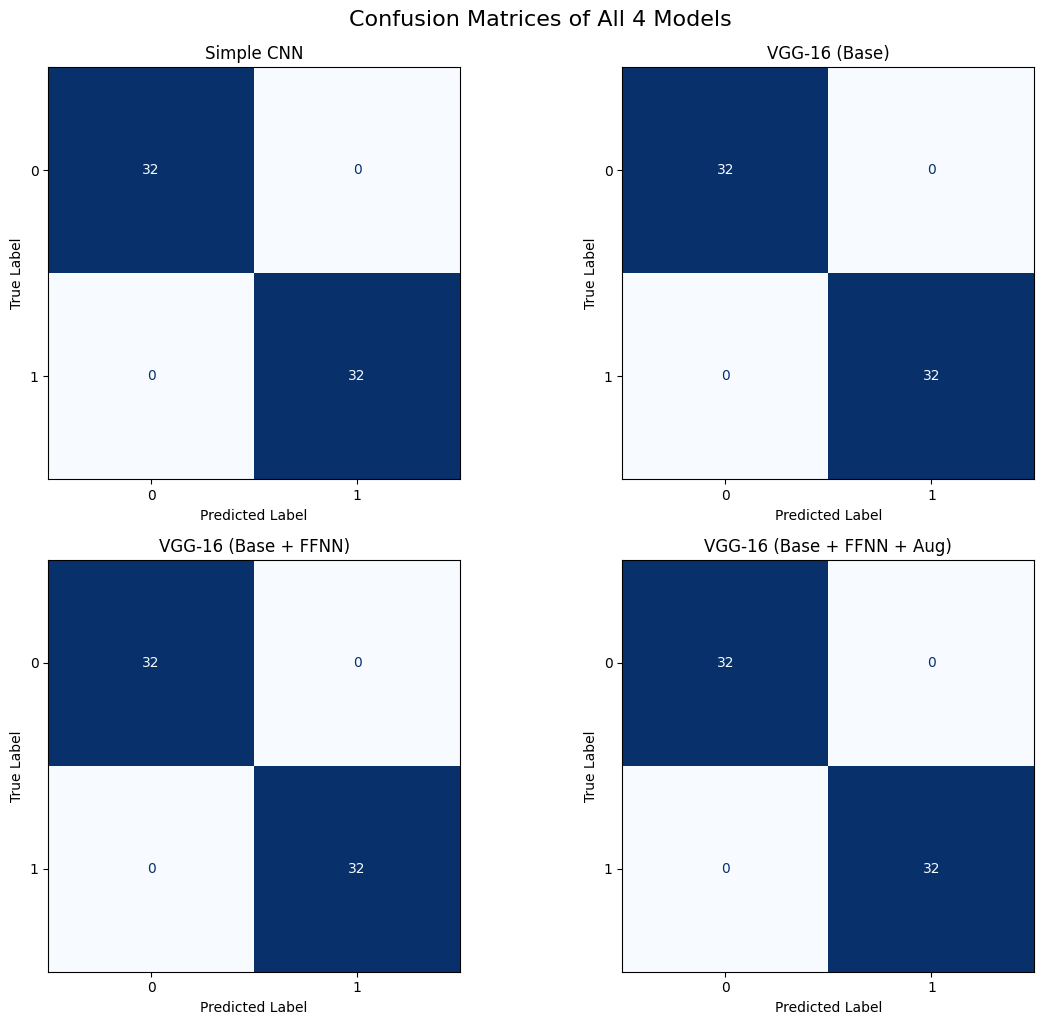

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix from model and test data
def plot_conf_matrix(model, X, y_true, title, ax):
    y_pred = (model.predict(X) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Create 2×2 grid for the 4 models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each model’s confusion matrix
plot_conf_matrix(model_cnn, X_test_normalized, y_test, "Simple CNN", axes[0, 0])
plot_conf_matrix(model_vcg_base, X_test_normalized, y_test, "VGG-16 (Base)", axes[0, 1])
plot_conf_matrix(model_vcg_fcnn, X_test_normalized, y_test, "VGG-16 (Base + FFNN)", axes[1, 0])
plot_conf_matrix(model_vcg_fcnn_data_aug, X_test_normalized, y_test, "VGG-16 (Base + FFNN + Aug)", axes[1, 1])

plt.tight_layout()
plt.suptitle("Confusion Matrices of All 4 Models", fontsize=16, y=1.02)
plt.show()


- All models have achieved a very good performance
- Now its about which model does the prediction faster.

## Find which model would be efficient in terms of latency while scoring in prod

In [100]:
import time
import numpy as np

def measure_prediction_time(model, X, name):
    start = time.perf_counter()
    _ = model.predict(X, verbose=0)
    end = time.perf_counter()
    duration = end - start
    print(f"{name} prediction time: {duration:.4f} seconds")
    return duration

# Measure prediction time for each model
time_cnn = measure_prediction_time(model_cnn, X_test_normalized, "Simple CNN")
time_vgg_base = measure_prediction_time(model_vcg_base, X_test_normalized, "VGG-16 (Base)")
time_vgg_fcnn = measure_prediction_time(model_vcg_fcnn, X_test_normalized, "VGG-16 (Base + FFNN)")
time_vgg_aug = measure_prediction_time(model_vcg_fcnn_data_aug, X_test_normalized, "VGG-16 (Base + FFNN + Aug)")


Simple CNN prediction time: 0.1243 seconds
VGG-16 (Base) prediction time: 0.4530 seconds
VGG-16 (Base + FFNN) prediction time: 0.3692 seconds
VGG-16 (Base + FFNN + Aug) prediction time: 0.3708 seconds


# **Actionable Insights & Recommendations**

## Our Production Model Selection

### Model Comparison

| Metric              | Simple CNN | VGG-16 (Base) | VGG-16 (Base + FFNN) | VGG-16 (Base + FFNN + Data Augmentation) |
|---------------------|------------|---------------|-----------------------|-------------------------------------------|
| Accuracy            | 1.00       | 1.00          | 1.00                  | 1.00                                      |
| Recall              | 1.00       | 1.00          | 1.00                  | 1.00                                      |
| Precision           | 1.00       | 1.00          | 1.00                  | 1.00                                      |
| F1 Score            | 1.00       | 1.00          | 1.00                  | 1.00                                      |
| Prediction Time (s) | **0.1243** | 0.4530        | 0.3692                | 0.3708                                    |

---

### **Model We Recommend for Production: Simple CNN**

Even though all models achieved perfect performance across accuracy, precision, recall, and F1 score, the **Simple CNN** delivers **the fastest prediction time (0.1243s)**. This makes it an excellent choice for **real-time applications** such as:

- Monitoring worker helmet compliance through live camera feeds  
- Edge deployment on low-resource devices  
- Quick-response safety alert systems

---

### Why We Chose It

- All models show identical test accuracy → no added value from heavier models  
- The Simple CNN is **3–4× faster** than the VGG-based alternatives  
- Lower computational load means **faster inference**, **cheaper deployment**, and **less power usage**

---

### What We Recommend Next

1. **Deploy the Simple CNN** as our production-ready model  
   - It’s efficient, accurate, and ideal for scaling  
   - Easy to maintain and update as new data comes in

2. **Monitor real-world usage** post-deployment  
   - Track any misclassifications or edge cases  
   - Collect feedback for improving future versions

3. **Use the VGG-based models for benchmarking or offline evaluations**  
   - Keep them for comparison or model retraining cycles

4. **Explore lightweight optimized models** like **MobileNetV2** or **EfficientNet-lite**  
   - These can provide better complexity-speed trade-offs if needed in future phases

---

In summary, we recommend moving forward with the **Simple CNN**, as it offers the best balance of speed, simplicity, and accuracy for production deployment in helmet detection systems.
